<a href="https://colab.research.google.com/github/EduardoWS/Calculo-Numerico/blob/main/EduardoRibeiroRodrigues_13696679_Turma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Decomposição em Valores Singulares (SVD)**

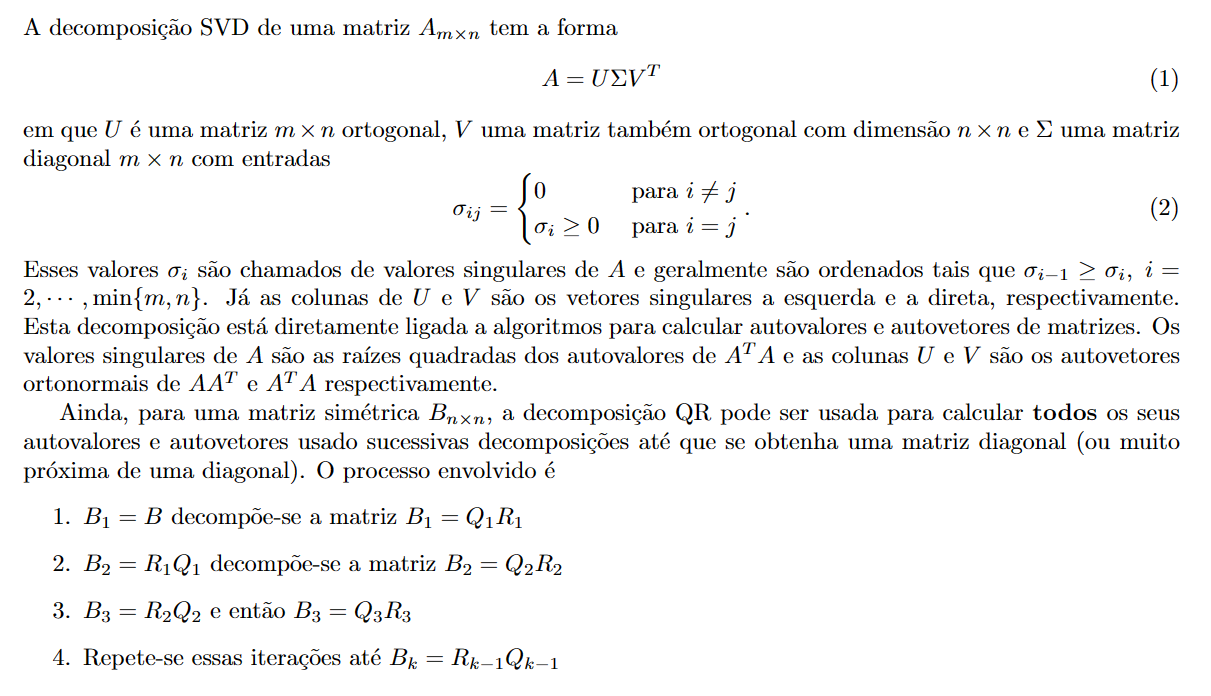

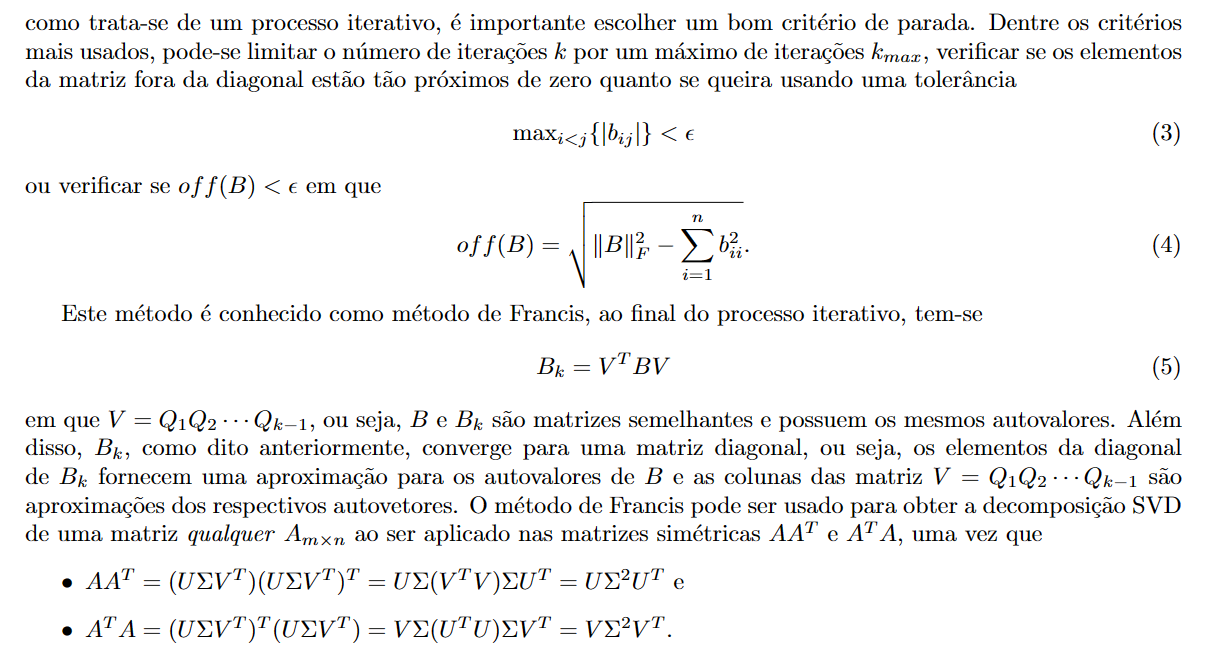

<hr>

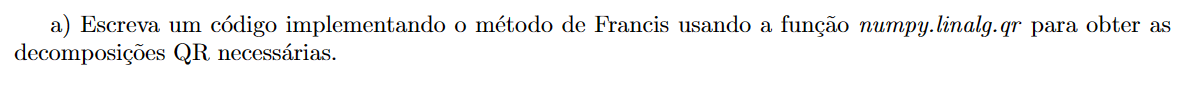

In [13]:
import numpy as np

def francis_method(A, tolerance=1e-6, max_iterations=100):
    n = A.shape[0]
    H = A.copy()
    Q = np.eye(n)

    for i in range(max_iterations):
        # Decomposição QR de H
        Q, R = np.linalg.qr(H)

        # Multiplica as matrizes na ordem correta para obter H_tilde
        H_tilde = np.dot(R, Q)

        # Verifica a convergência
        error = np.max(np.abs(H_tilde - H))
        if error < tolerance:
            break

        H = H_tilde

    return np.diagonal(H_tilde), Q

Explicação do código:

1. Importamos a biblioteca numpy e definimos a função francis_method.
2. A é a matriz de entrada na qual queremos encontrar os autovalores e autovetores.
tolerance é o critério de convergência. Se a diferença entre duas iterações consecutivas for menor que tolerance, o método para.
3. max_iterations é o número máximo de iterações permitidas para evitar um possível loop infinito.
4. n é o tamanho da matriz A.
5. Criamos uma cópia de A em H e a matriz identidade Q.
6. Iteramos max_iterations vezes ou até atingirmos a convergência.
7. Utilizamos a função numpy.linalg.qr para obter a decomposição QR de H, retornando Q e R.
8. Multiplicamos as matrizes R e Q na ordem correta para obter H_tilde.
9. Verificamos se a diferença entre H e H_tilde é menor que tolerance para determinar a convergência. Se for, interrompemos o loop.
10. Atualizamos H com H_tilde para a próxima iteração.
11. Retornamos a diagonal de H_tilde como os autovalores e Q como os autovetores.

<hr>

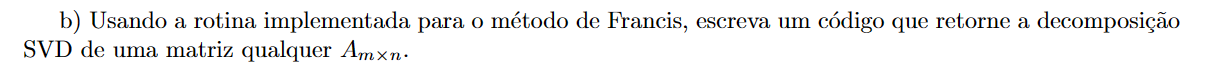

In [14]:
def svd_decomposition(A, tolerance=1e-6, max_iterations=100):
    m, n = A.shape
    if m < n:
        raise ValueError("A matriz deve ter mais linhas do que colunas para realizar a decomposição SVD.")

    # Passo 1: Decomposição QR
    H = A.copy()
    Q = np.eye(m)

    for i in range(max_iterations):
        Q, R = np.linalg.qr(H)
        H_tilde = np.dot(R, Q)

        error = np.max(np.abs(H_tilde - H))
        if error < tolerance:
            break

        H = H_tilde

    # Passo 2: Decomposição bidiagonal
    B = H_tilde
    U = np.eye(m)
    V = np.eye(n)

    for i in range(n - 1):
        # Atualiza a matriz B
        Q, R = np.linalg.qr(B)
        B = np.dot(R, Q)

        # Atualiza as matrizes U e V
        U = np.dot(U, Q)
        V = np.dot(V, R)

    # Passo 3: Obtenção dos valores singulares
    singular_values = np.diagonal(B)

    # Ordena os valores singulares em ordem decrescente
    sorted_indices = np.argsort(singular_values)[::-1]
    singular_values = singular_values[sorted_indices]
    U = U[:, sorted_indices]
    V = V[:, sorted_indices]

    return U, singular_values, V.T

In [16]:
# Exemplo
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

U, singular_values, Vt = svd_decomposition(A)
print("Matriz U:")
print(U)
print("\nValores singulares:", singular_values)
print("\nMatriz V^T:")
print(Vt)

Matriz U:
[[ 1.00000000e+000  5.54851660e-134 -9.67430422e-010]
 [ 9.67430422e-010 -1.92482135e-124  1.00000000e+000]
 [ 1.30727907e-133  1.00000000e+000  1.92482135e-124]]

Valores singulares: [ 1.61168440e+01 -3.62597321e-16 -1.11684397e+00]

Matriz V^T:
[[ 2.59752660e+02  0.00000000e+00  0.00000000e+00]
 [ 5.11728530e-14 -7.23866997e-16  1.31476818e-31]
 [-7.34846923e+01  1.24734045e+00  0.00000000e+00]]


Explicação do código:

1. A é a matriz de entrada que queremos decompor em U, valores singulares e V^T.
2. tolerance é o critério de convergência usado no método de Francis.
3. max_iterations é o número máximo de iterações permitidas no método de Francis.
4. m e n são as dimensões da matriz A.
5. Verificamos se A tem mais linhas do que colunas, pois essa é uma restrição para a decomposição SVD.
6. Copiamos A para H e inicializamos as matrizes Q com a matriz identidade m × m.
7. Realizamos o passo 1 do método de Francis (decomposição QR) para obter H_tilde, Q e R.
8. Verificamos a convergência usando o critério de tolerância.
9. Atualizamos H com H_tilde para a próxima iteração.
10. Copiamos H_tilde para B e inicializamos as matrizes U e V com as matrizes identidade m × m e n × n, respectivamente.
11. Realizamos o passo 2 do método de Francis (decomposição bidiagonal) para obter as matrizes B, U e V.
12. Atualizamos B, U e V a cada iteração.
13. Extraímos os valores singulares da diagonal de B.
14. Ordenamos os valores singulares em ordem decrescente, junto com as colunas correspondentes em U e V.
15. Retornamos as matrizes U, singular_values e V^T.
16. No exemplo de uso, criamos uma matriz de exemplo A e chamamos a função svd_decomposition para obter as matrizes U, valores singulares e V^T.
17. Imprimimos as matrizes U, valores singulares e V^T na saída.




<hr>

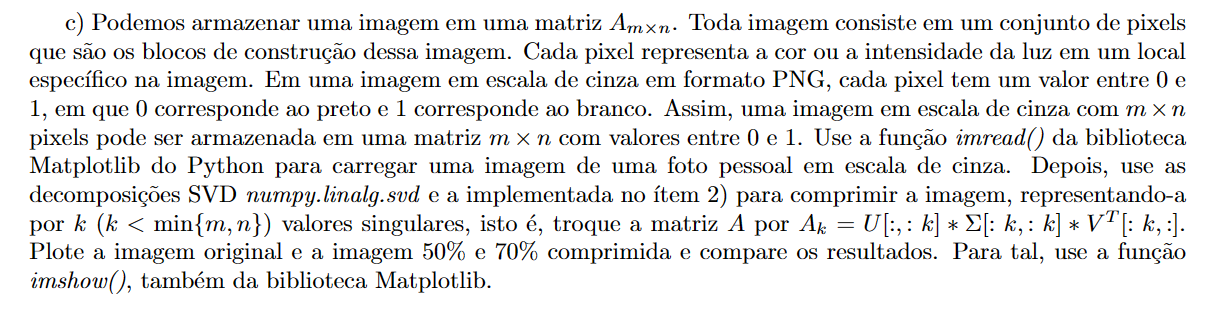